# Testing Jupyter Lab/Notebooks

Follow along with [this project](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb)

## Using [Pandas](https://pandas.pydata.org/) to read and manipulate data

In [30]:
import pandas as pd

iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can see that rows `[8, 12]` do not have values for the `petal_width_cm` property. With **Pandas** we can we can specify these values:

In [31]:
iris_data = pd.read_csv('data/iris-data.csv', na_values=['NA'])

Let's start by printing out some summary statistics about the data set.

In [32]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plotting with [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/)

In [33]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Creating a **scatterplot matrix**

**Note:** we need to drop rows with 'NA' values because seaborn does not know what to do with them

/home/marantesss/Documents/feup-iart/TP08/env/lib64/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/marantesss/Documents/feup-iart/TP08/env/lib64/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/marantesss/Documents/feup-iart/TP08/env/lib64/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/marantesss/Documents/feup-iart/TP08/env/lib64/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


'# this line removes object print'

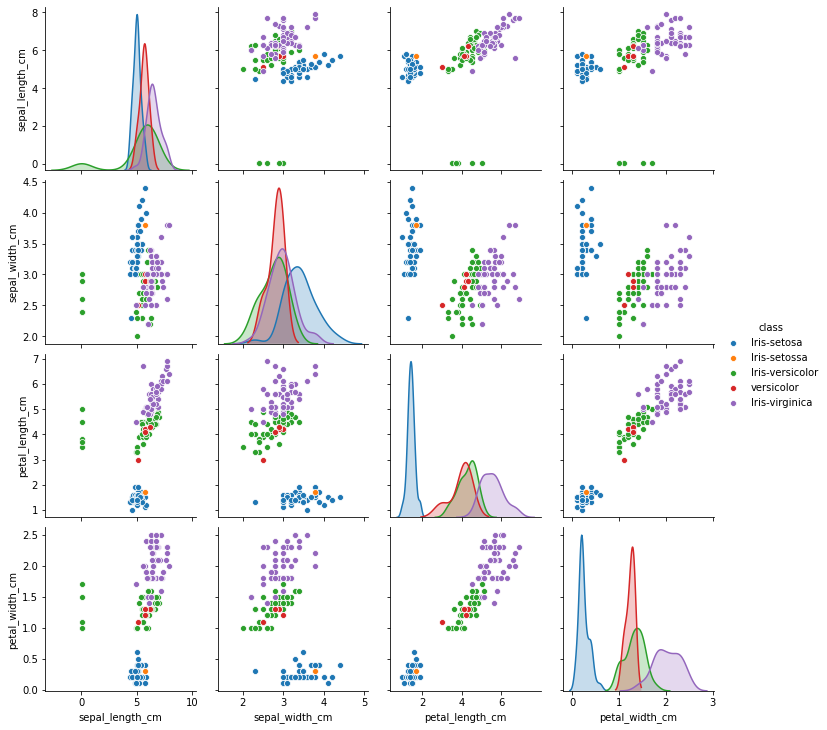

In [34]:
sb.pairplot(iris_data.dropna(), hue='class')
; # this line removes object print

### Problem with the data

1. There are 5 classes when in fact there are only 3 (*iris-setosa*, *iris-versicolor*, *iris-virginica*)
2. There are some **outliers** in the measurements they may be erroneus.
3. We dropped rows `[8, 12]` due to missing values

## Tidying the data

> 1.There are 5 classes when in fact there are only 3 (*iris-setosa*, *iris-versicolor*, *iris-virginica*)

### Problems:
 - **Row 19:** misspeled *Iris-setossa*


In [36]:
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

 - **Rows 96 to 100:** missing *iris-* before *versicolor* 

In [38]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'

Confirm everything is ok with class names:

In [39]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

> 2. There are some **outliers** in the measurements they may be erroneus.

### *Iris-setosa* anomalous entry

In the case of the one anomalous entry for *Iris-setosa*, let's say our field researchers know that **it's impossible for *Iris-setosa* to have a sepal width below 2.5 cm.** Clearly this entry was made in error, and **we're better off just scrapping the entry than spending hours finding out what happened**.

In [40]:
# we want entries that are not Iris-setosa OR have a sepal width greater than 2.5cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]

Checking the existense of outliers with a **histogram**.

''

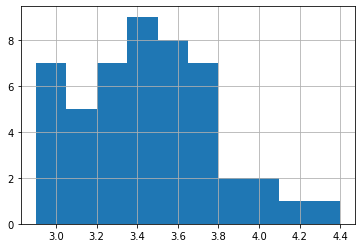

In [41]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()
;

### *Iris-versicolor* near-zero sepal lenghts rows

Let's take a look at those rows

In [42]:
# locate Iris-versicolor with sepal length lesser than 1.0 cm
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


These measurements have been **recorded in meters** instead of centimeters.

Let's fix this issue

''

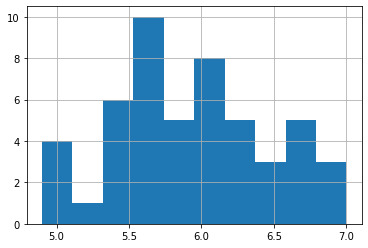

In [43]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

> 3. We dropped rows `[8, 12]` due to missing values

Let us first take a look at these null values:

In [44]:
# locate any attribute value with null values
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


It's not ideal that we had to drop those rows, especially considering they're all *Iris-setosa* entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same Iris type — this error could potentially bias our analysis.

One way to deal with missing data is **mean imputation:** If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

Let's see if we can do that here.

''

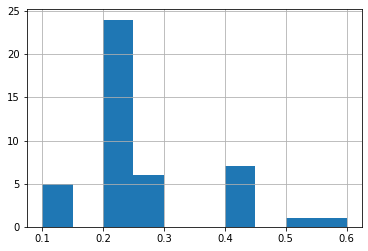

In [45]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()
;

Most of the petal widths for *Iris-setosa* **fall within the 0.2-0.3 range**, so let's fill in these entries with the average measured petal width.

In [54]:
# calculate mean/avg
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
# replace null values with mean
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width
# print newly updated entries
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [55]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


After cleaning our data we should save our clean dataset.

'Clean Scatterplot'

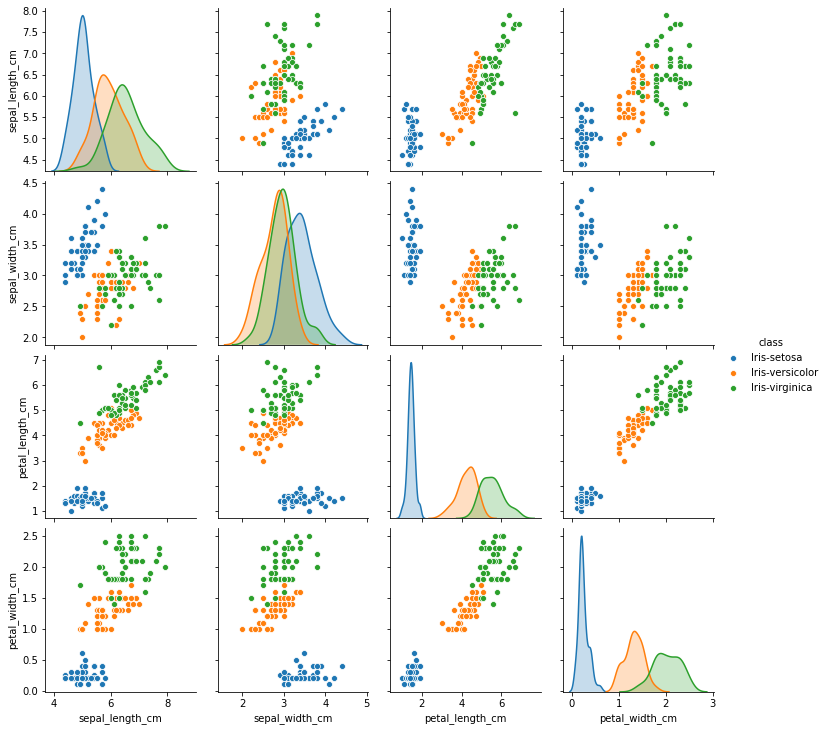

In [60]:
# saving clean dataset
path_to_clean_csv = 'data/iris-data-clean.csv'
iris_data.to_csv(path_to_clean_csv, index=False)
iris_data_clean = pd.read_csv(path_to_clean_csv)
# show clean scatterplot
sb.pairplot(iris_data_clean, hue='class')
; Clean Scatterplot

## Testing our Data

We can quickly test our data using `assert` statements: We assert that something must be true, and if it is, then nothing happens and the notebook continues running. However, if our assertion is wrong, then the notebook stops running and brings it to our attention.

In [61]:
# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

In [62]:
# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

In [63]:
# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

## Exploratory Analysis

This is the part where we plot the heck out of our data.

''

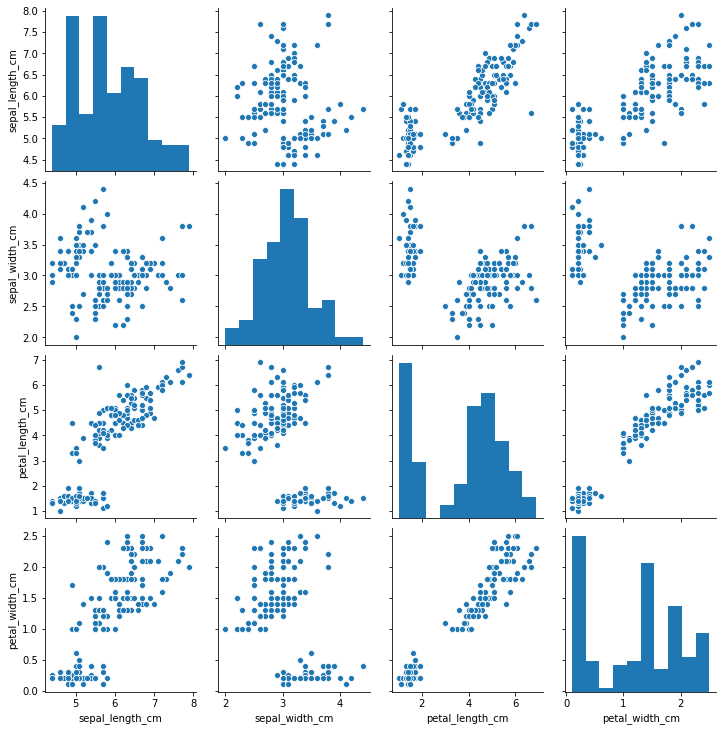

In [64]:
sb.pairplot(iris_data_clean)
;

Our data is **normally distributed for the most part**, **which is great news** if we plan on using any modeling methods that assume the data is normally distributed.

There's **something strange going on with the petal measurements**. Maybe it's something to do with the different Iris types. Let's color code the data by the class again to see if that clears things up.

''

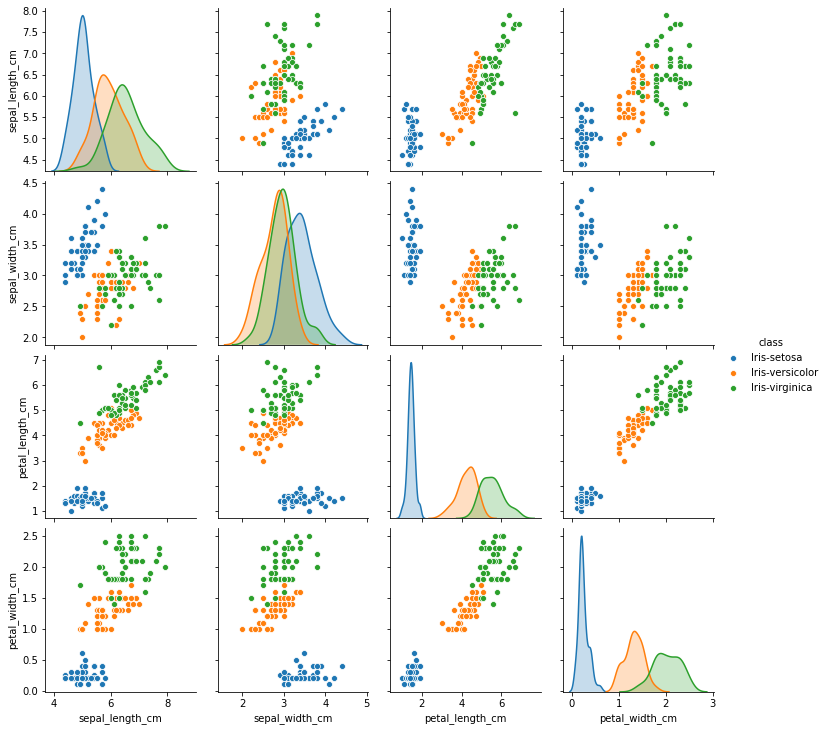

In [65]:
sb.pairplot(iris_data_clean, hue='class')
;

Sure enough, the strange distribution of the petal measurements exist because of the **different species**. This is actually **great news for our classification task** since it means that the petal measurements will make it easy to distinguish between *Iris-setosa* and the other Iris types.

Distinguishing *Iris-versicolor* and *Iris-virginica* will prove more difficult given how much their measurements overlap.

We can also make **[violin plots](https://en.wikipedia.org/wiki/Violin_plot)** of the data to compare the measurement distributions of the classes. Violin plots contain the same information as **[box plots](https://en.wikipedia.org/wiki/Box_plot)**, but also scales the box according to the density of the data.

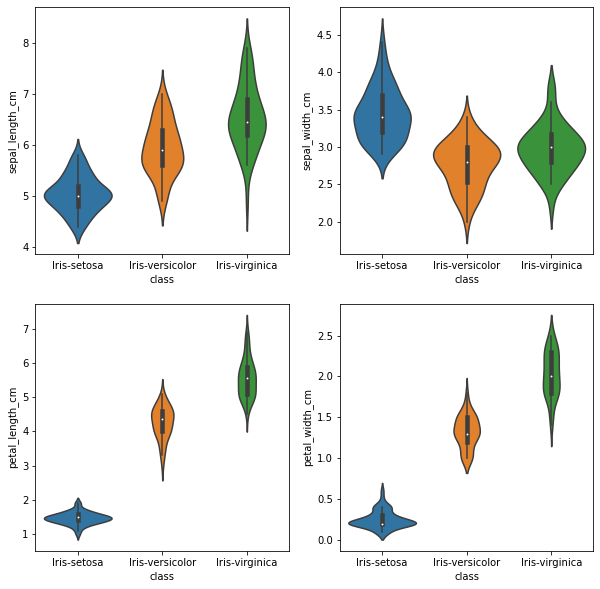

In [79]:
# plt : matplotlib pyplot
plt.figure(figsize=(10, 10))

# iris_data_clean.columns : Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class'], dtype='object')
for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

## Classification

Wow, all this work and we still haven't modeled the data!

As tiresome as it can be, **tidying and exploring our data is a vital component** to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model.

#### Remember: Bad data leads to bad models. Always check your data first.

---

Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to start splitting the data into training and testing sets:
 - A **training set** is a random subset of the data that we use to train our models.
 - A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to **overfit** the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.

In [93]:
iris_data_clean = pd.read_csv(path_to_clean_csv)

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the class labels
all_labels = iris_data_clean['class'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [100]:
from sklearn.model_selection import train_test_split

(training_inputs, testing_inputs,
 training_classes, testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

## Decision Trees

Decision tree classifiers are incredibly simple in theory. In their simplest form, **decision tree classifiers ask a series of Yes/No questions about the data** — each time getting closer to finding out the class of each entry — until they either classify the data set perfectly or simply can't differentiate a set of entries.

The nice part about decision tree classifiers is that they are **scale-invariant**, i.e., the scale of the features does not affect their performance, unlike many Machine Learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; decision tree classifiers will work with them just the same.

In [128]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

Our model achieves 97% classification accuracy without much effort.

However, there's a catch: Depending on how our training and testing set was sampled, our model can achieve anywhere from 80% to 100% accuracy:

''

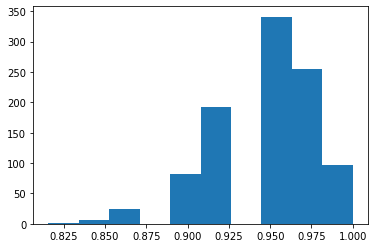

In [107]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs, testing_inputs,
     training_classes, testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as **overfitting**.

## Cross-Validation

This problem (overlifting) is the main reason that most data scientists perform **k-fold cross-validation** on their models: Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:

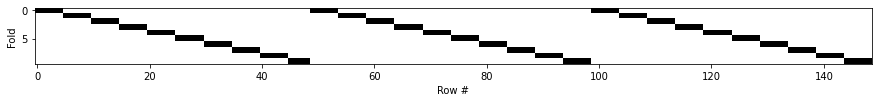

In [141]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

You'll notice that we used **Stratified k-fold cross-validation** in the code above. Stratified k-fold **keeps the class proportions the same across all of the folds**, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% Iris setosa entries in one of the folds.)

''

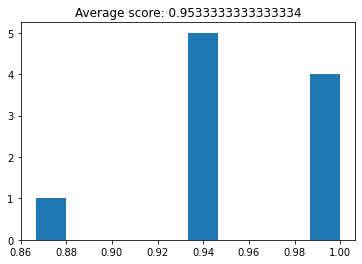

In [146]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

### Parameter Tuning

Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:

''

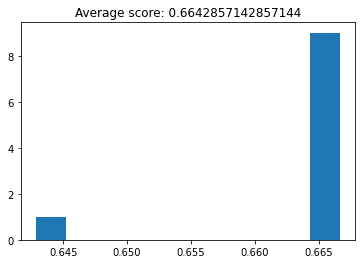

In [147]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

the classification accuracy falls tremendously.

Therefore, we need to find a systematic method to discover the best parameters for our model and data set.

The most common method for model parameter tuning is Grid Search. The idea behind **[Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)** is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

In [163]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [1, 2, 3, 4]
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9666666666666666
Best parameters: {'max_depth': 4, 'max_features': 3}


Now let's visualize the grid search to see how the parameters interact.

''

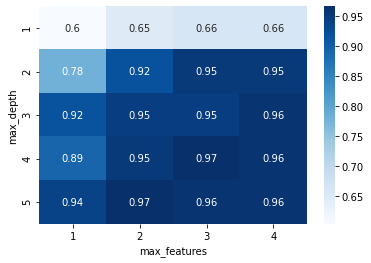

In [166]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision.

`max_features` doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.)

Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [176]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9733333333333334
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'splitter': 'best'}


Now we can take the best classifier from the Grid Search and use that:

In [177]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

We can even visualize the decision tree with **[GraphViz](http://www.graphviz.org/)** to see how it's making the classifications:

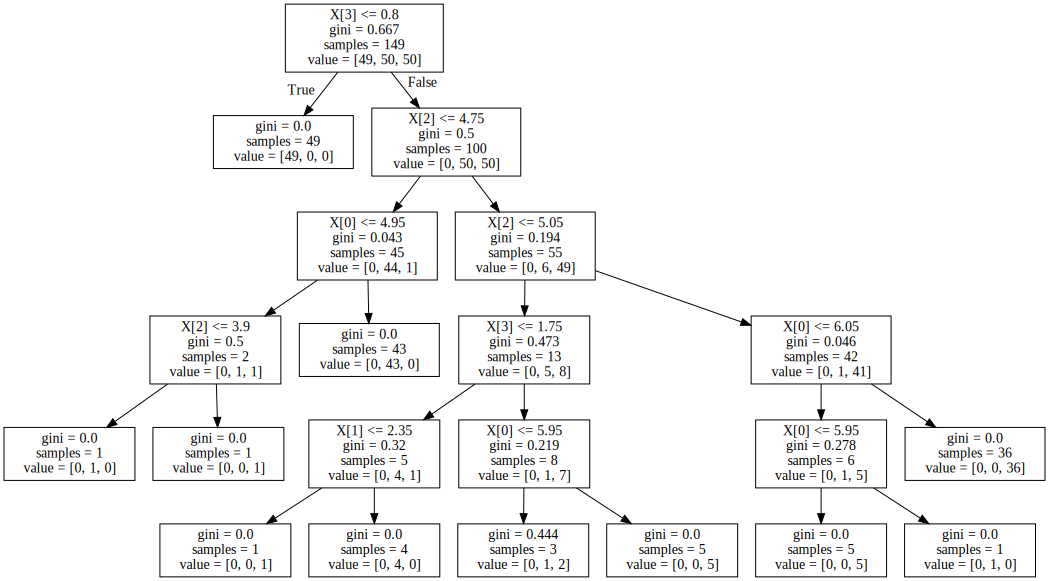

In [185]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO
import graphviz

with open('graphs/iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
    
with open("graphs/iris_dtc.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

Alright! We finally have our demo classifier. Let's create some visuals of its performance so we have something to show our company's Head of Data.

''

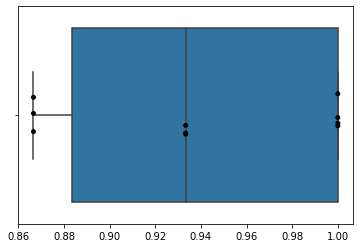

In [186]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')
;

Hmmm... that's a little boring by itself though. How about we compare another classifier to see how they perform?

We know that Random Forest classifiers usually work better than individual decision trees. A common problem that decision trees face is that they're prone to overfitting: They complexify to the point that they classify the training set near-perfectly, but fail to generalize to data they have not seen before.

**Random Forest classifiers work around that limitation** by creating a whole bunch of decision trees (hence "forest") — each trained on random subsets of training samples (drawn with replacement) and features (drawn without replacement) — and have the decision trees work together to make a more accurate classification.

Let's see if a Random Forest classifier works better here.

The great part about scikit-learn is that the training, testing, parameter tuning, etc. process is the same for all models, so we only need to plug in the new classifier.

In [188]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {
    'n_estimators': [10, 25, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': [1, 2, 3, 4]
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9666666666666668
Best parameters: {'criterion': 'entropy', 'max_features': 2, 'n_estimators': 25}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

''

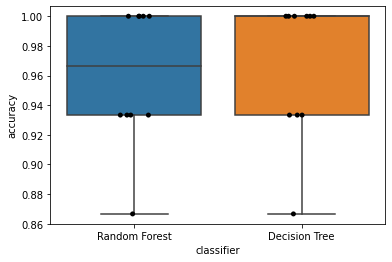

In [213]:
random_forest_classifier = grid_search.best_estimator_

random_forest_dataframe = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
decision_tree_dataframe = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = random_forest_dataframe.append(decision_tree_dataframe)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

How about that? They both seem to perform about the same on this data set. This is probably because of the limitations of our data set: We have only 4 features to make the classification, and Random Forest classifiers excel when there's hundreds of possible features to look at. In other words, there wasn't much room for improvement with this data set.